In [1]:
# 图像增强是扩大样本集的常用手段

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

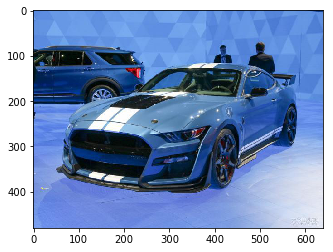

In [2]:
# 图像的编码处理
# 读取图像的原始数据
image_raw_data = tf.gfile.FastGFile('./car.jpeg','rb').read()

with tf.Session() as sess:
    # 对图像进行jpeg格式解码，从而得到图像对应的三维矩阵
    #  tf.image.decode_png     tf.image.decode_gif    tf.image.decode_image
    img_data = tf.image.decode_jpeg(image_raw_data)
   
    
    # 解码后的结果是一个张量
    # print(img_data.eval())
    
    # 可视化
    plt.imshow(img_data.eval())
    plt.show()

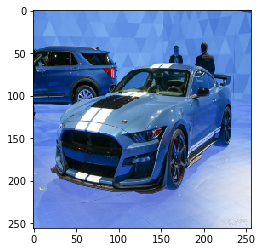

In [3]:
# 图像缩放 
# 实际使用时，大部分的图片像素不同，我们需要将其缩放为同一个尺寸进行训练。
# 如car.jpeg 原图为 640 * 480。 我们将其变为256 256
# 有4种method控制该操作 method:
# - 0 双线性插值 BILINEAR
# - 1 最近邻插值 NEAREST_NEIGHBOR
# - 2 双立方插值 BICUBIC
# - 3 像素区域插值 AREA
# 可以试着切换 method = 0，1,2,3， 调整结果差别不大


with tf.Session() as sess:
    resized1 = tf.image.resize_images(img_data, [256,256], method=0)
    resized1 = np.asarray(resized1.eval(), dtype='uint8')
    plt.imshow(resized1)
    plt.show()

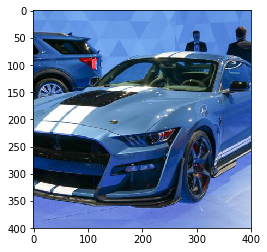

In [4]:
# 裁剪或填充 (如果target小于原始图像，则在中心位置裁剪，否则利用黑色像素填充)
with tf.Session() as sess:
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 400, 400)
    plt.imshow(croped.eval())
    plt.show()

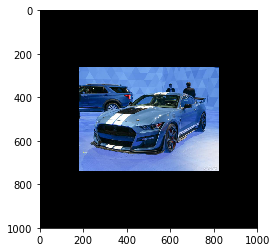

In [5]:
# 裁剪或填充 (如果target小于原始图像，则在中心位置裁剪，否则利用黑色像素填充)
with tf.Session() as sess:
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
    plt.imshow(croped.eval())
    plt.show()

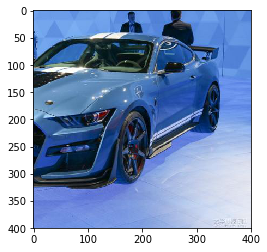

In [6]:
# 随机裁剪
with tf.Session() as sess:
    random_croped = tf.random_crop(img_data, [400,400,3])
    plt.imshow(random_croped.eval())
    plt.show()

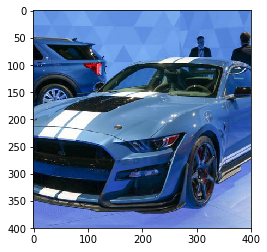

In [7]:
with tf.Session() as sess:
    random_croped2 = tf.random_crop(img_data, [400,400,3])
    plt.imshow(random_croped2.eval())
    plt.show()

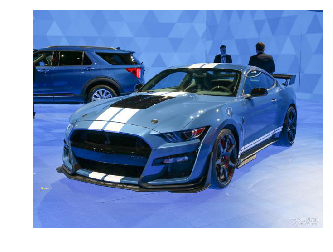

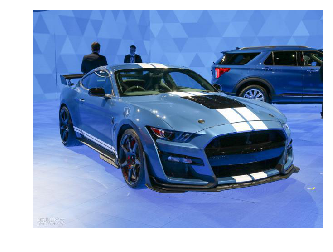

In [8]:
# 水平翻转
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.axis('off')
    plt.show()
    
    flip_left_right = tf.image.flip_left_right(img_data)
    plt.imshow(flip_left_right.eval())
    plt.axis('off')
    plt.show()
    

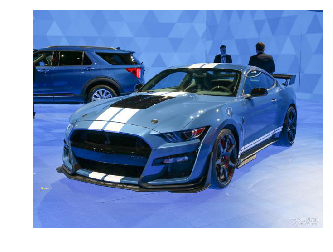

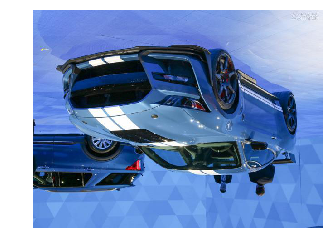

In [9]:
# 垂直翻转
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.axis('off')
    plt.show()
    
    flip_up_down = tf.image.flip_up_down(img_data)
    plt.imshow(flip_up_down.eval())
    plt.axis('off')
    plt.show()
    

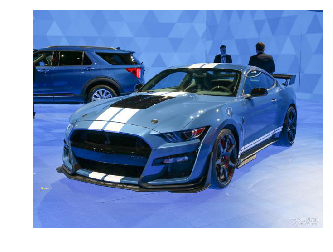

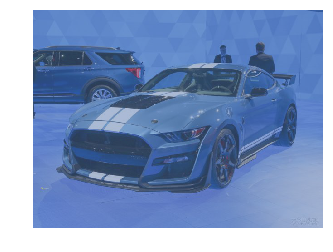

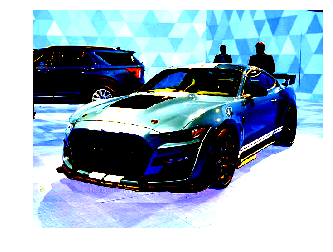

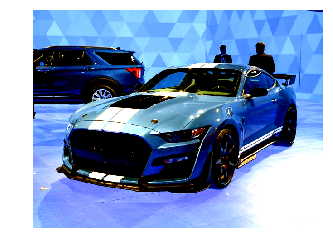

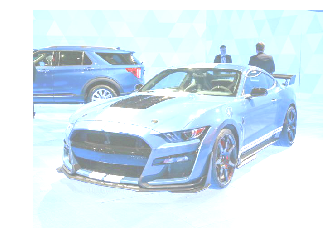

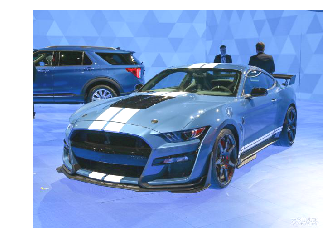

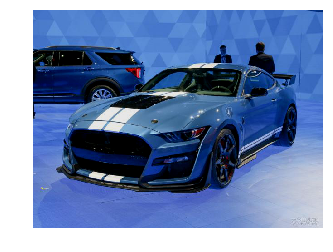

In [17]:
# 改变对比度，亮度等
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.axis('off')
    plt.show()
    
    adjust_contrast_half = tf.image.adjust_contrast(img_data, 0.5)
    plt.imshow(adjust_contrast_half.eval())
    plt.axis('off')
    plt.show()
    
    
    adjust_contrast_5x = tf.image.adjust_contrast(img_data, 5)
    plt.imshow(adjust_contrast_5x.eval())
    plt.axis('off')
    plt.show()
    
    
    random_contrast = tf.image.random_contrast(img_data, lower=0.2, upper=3)
    plt.imshow(random_contrast.eval())
    plt.axis('off')
    plt.show()
    
    
      
    adjust_brightness_half = tf.image.adjust_brightness(img_data, 0.5)
    plt.imshow(adjust_brightness_half.eval())
    plt.axis('off')
    plt.show()
    
    
    adjust_brightness_5x = tf.image.adjust_brightness(img_data, 0.1)
    plt.imshow(adjust_brightness_5x.eval())
    plt.axis('off')
    plt.show()
    
    
    random_brightness = tf.image.random_brightness(img_data, max_delta=0.8)
    plt.imshow(random_brightness.eval())
    plt.axis('off')
    plt.show()
    

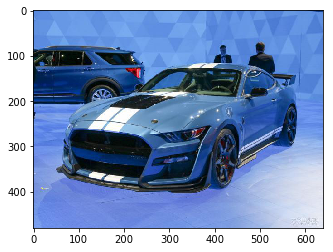

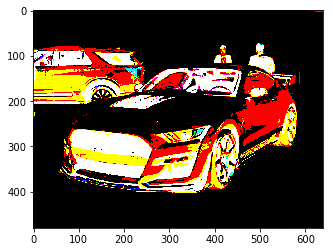

In [18]:
# 白化处理
# 将图像的像素值转化为零均值和单位方差

with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.show()
    
    standardization = tf.image.per_image_standardization(img_data)
    plt.imshow(np.asarray(standardization.eval(), dtype='uint8'))
    plt.show()